# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

**Цели иследования:**

    1. Выявить рыночную стоимость недвижимости.
    2. С помощью графиков наглядно показать зависимости между данными.
    3. Понять что влияет на цену недвижимости.
    
**План действий:**

    1. Обзор данных из предоставленного датасета.
    2. Предобработка.
    3. При необходимости, создание новых дополнительных данных из уже имеющихся.
    4. Проведения анализа и иследованния.
    5. Постороенние зависимостей.
    6. Выявление различных факторов влияющих на ценообразование.
    7. Вывод.

### Откроем файлы с данными и изучим общую информацию. 

In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt

df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t'); df

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.3,3,NaN,...,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,...,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,...,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17.0,NaN,12,NaN,...,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0


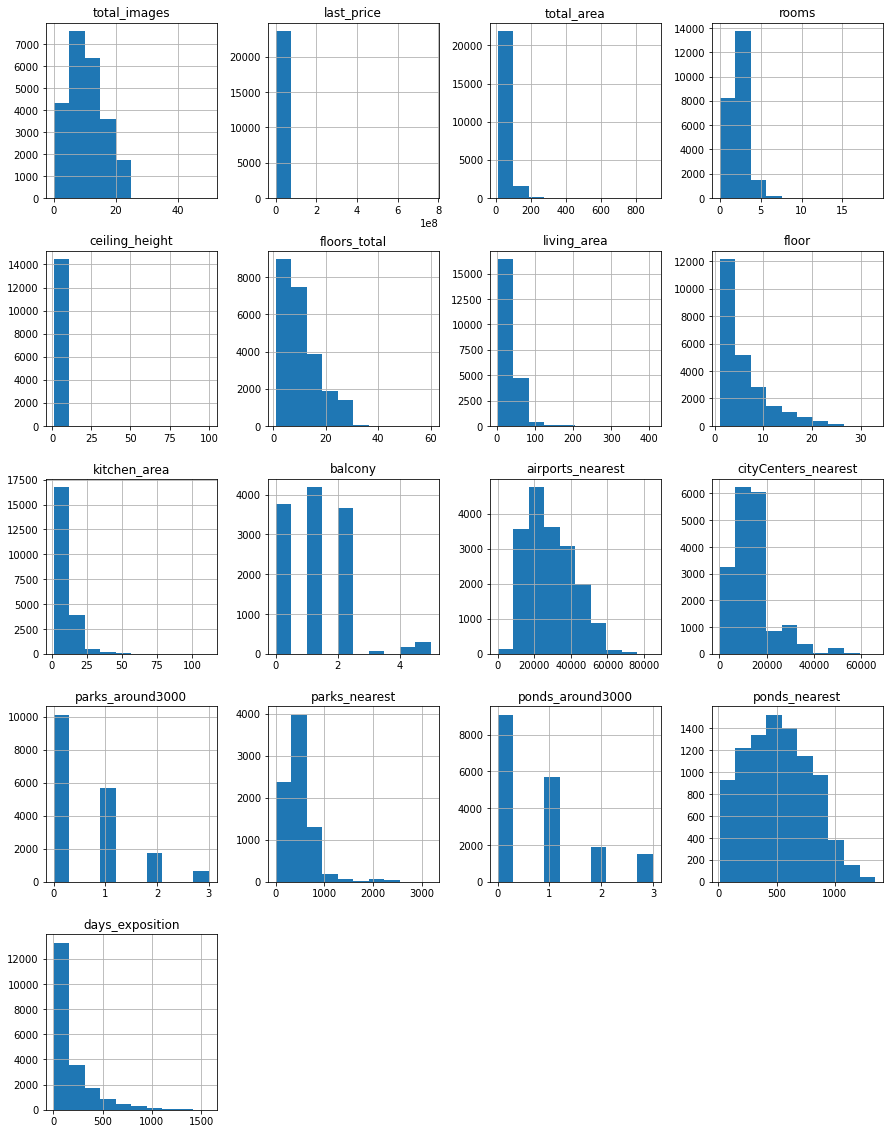

In [2]:
df.hist(figsize=(15, 20));

**Вывод:**
    
    Открыв файл сделали гистограммы по всем столбцам, для первичного взгляда. Далее займемся предобработкой данных.

### Предобработка данных

In [3]:
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Так как много значений пропущенных, можно посмотреть и проанализировать их и мы увидим что такие значения как количество балконов можно предположить что их просто нет, поэтому заменим их на 0. Остальные показания сложно заменить подобным образом, так как наврятли площади квартир, где есть пропуск могут быть 0. Так же можем населенный пункт где есть пропуски назвать как "неизвестный".

In [5]:
df['locality_name'] = df['locality_name'].fillna('unknown')
df['balcony'] = df['balcony'].fillna(0)
df['is_apartment'] = df['is_apartment'].fillna('False')

In [6]:
df = df.astype({'floors_total': 'int64', 'balcony': 'int64', 'parks_around3000': 'int64', \
               'ponds_around3000': 'int64', 'days_exposition': 'int64', 'is_apartment': 'bool', 'last_price': 'int64'}, errors='ignore');df

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,True,...,25.00,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,True,...,11.00,2,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,True,...,8.30,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,True,...,NaN,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,True,...,41.00,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.3,3,True,...,13.83,0,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,True,...,8.50,0,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,True,...,NaN,0,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000,76.75,2017-03-28T00:00:00,2,3.00,17.0,NaN,12,True,...,23.30,2,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0


Пропуски могли образоваться как и по человеческим факторам, банально решили не указывать какие то значения, либо просто не знали их, вероятно форма заполнения не имеет строгих полей для заполнения. Либо же фактор сбоя технический.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  int64  
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          23699 non-null  bool   
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               23699 non-null  int64  
 14  locality_name         23699 non-null  object 
 15  airports_nearest   

Если вглянуть на типы данных наших категорий, то можно заметить что такие показатели примеру как число этажей, количество балконов и тп. имеют тип данных float, но очевидно что пол этажа или четверьт балкона быть не может, соотвесвтенно такие показатели надо заменить их тип данных с float на int. Это будет и верно и в тоже время уменьшет потребленние памяти.

Займемся поиском и удалением неявных дубликатов

In [8]:
df.value_counts(['locality_name'])

locality_name     
Санкт-Петербург       15721
посёлок Мурино          522
посёлок Шушары          440
Всеволожск              398
Пушкин                  369
                      ...  
поселок Каложицы          1
поселок Кирпичное         1
поселок Коммунары         1
поселок Коробицыно        1
село Шум                  1
Length: 365, dtype: int64

In [9]:
df = df.apply(lambda x: x.replace({'поселок':'посёлок', 'городской посёлок': 'посёлок', 'посёлок городского типа': 'посёлок', 'коттеджный посёлок': 'посёлок', 'посёлок при железнодорожной станции': 'посёлок станции'}, regex=True))

len(df.locality_name.unique())

334

In [10]:
df['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'посёлок городского типа Красный Бор', 'Гатчина',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок Лебяжье', 'посёлок Сиверский', 'посёлок Молодцово',
       'посёлок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'посёлок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'посёлок Торковичи', 'посёлок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', 'посёлок Новый Свет', 'Сланцы',
       'село Путилово', 'Ивангород',

In [11]:
df.value_counts(['locality_name'])

locality_name         
Санкт-Петербург           15721
посёлок Мурино              556
посёлок Шушары              440
Всеволожск                  398
Пушкин                      369
                          ...  
посёлок Высокоключевой        1
посёлок Гладкое               1
посёлок Гончарово             1
посёлок Дзержинского          1
село Шум                      1
Length: 334, dtype: int64

In [12]:
df['ceiling_height'].unique()

array([  2.7 ,    nan,   3.03,   2.5 ,   2.67,   2.56,   3.05,   2.75,
         2.6 ,   2.9 ,   2.8 ,   2.55,   3.  ,   2.65,   3.2 ,   2.61,
         3.25,   3.45,   2.77,   2.85,   2.64,   2.57,   4.15,   3.5 ,
         3.3 ,   2.71,   4.  ,   2.47,   2.73,   2.84,   3.1 ,   2.34,
         3.4 ,   3.06,   2.72,   2.54,   2.51,   2.78,   2.76,  25.  ,
         2.58,   3.7 ,   2.52,   5.2 ,   2.87,   2.66,   2.59,   2.  ,
         2.45,   3.6 ,   2.92,   3.11,   3.13,   3.8 ,   3.15,   3.55,
         3.16,   3.62,   3.12,   2.53,   2.74,   2.96,   2.46,   5.3 ,
         5.  ,   2.79,   2.95,   4.06,   2.94,   3.82,   3.54,   3.53,
         2.83,   4.7 ,   2.4 ,   3.38,   3.01,   5.6 ,   3.65,   3.9 ,
         3.18,   3.35,   2.3 ,   3.57,   2.48,   2.62,   2.82,   3.98,
         2.63,   3.83,   3.52,   3.95,   3.75,   2.88,   3.67,   3.87,
         3.66,   3.85,   3.86,   4.19,   3.24,   4.8 ,   4.5 ,   4.2 ,
         3.36,  32.  ,   3.08,   3.68,   3.07,   3.37,   3.09,   8.  ,
      

In [13]:
df['ceiling_height'] = df['ceiling_height'].astype(str)

Займемся поиском аномальных значений

In [16]:
df['ceiling_height'] = df['ceiling_height'].replace('26.0', '2.6')
df['ceiling_height'] = df['ceiling_height'].replace('22.6', '2.26')
df['ceiling_height'] = df['ceiling_height'].replace('20.0', '2')
df['ceiling_height'] = df['ceiling_height'].replace('25.0', '2.5')
df['ceiling_height'] = df['ceiling_height'].replace('27.5', '2.75')
df['ceiling_height'] = df['ceiling_height'].replace('32.0', '3.2')
df['ceiling_height'] = df['ceiling_height'].replace('27.0', '2.7')
df['ceiling_height'] = df['ceiling_height'].replace('24.0', '2.4')

In [17]:
df['ceiling_height'] = df['ceiling_height'].astype(float)

In [18]:
df.loc[(df['ceiling_height'] < 2.5) | (df['ceiling_height'] > 4.75), 'ceiling_height'] = df['ceiling_height'].median()

In [19]:
df['ceiling_height'] = df['ceiling_height'].fillna(df['ceiling_height'].median())

In [20]:
df['ceiling_height'].unique()

array([2.7 , 2.65, 3.03, 2.5 , 2.67, 2.56, 3.05, 2.75, 2.6 , 2.9 , 2.8 ,
       2.55, 3.  , 3.2 , 2.61, 3.25, 3.45, 2.77, 2.85, 2.64, 2.57, 4.15,
       3.5 , 3.3 , 2.71, 4.  , 2.73, 2.84, 3.1 , 3.4 , 3.06, 2.72, 2.54,
       2.51, 2.78, 2.76, 2.58, 3.7 , 2.52, 2.87, 2.66, 2.59, 3.6 , 2.92,
       3.11, 3.13, 3.8 , 3.15, 3.55, 3.16, 3.62, 3.12, 2.53, 2.74, 2.96,
       2.79, 2.95, 4.06, 2.94, 3.82, 3.54, 3.53, 2.83, 4.7 , 3.38, 3.01,
       3.65, 3.9 , 3.18, 3.35, 3.57, 2.62, 2.82, 3.98, 2.63, 3.83, 3.52,
       3.95, 3.75, 2.88, 3.67, 3.87, 3.66, 3.85, 3.86, 4.19, 3.24, 4.5 ,
       4.2 , 3.36, 3.08, 3.68, 3.07, 3.37, 3.09, 3.26, 3.34, 2.81, 3.44,
       2.97, 3.14, 4.37, 2.68, 3.22, 3.27, 4.1 , 2.93, 3.46, 3.47, 3.33,
       3.63, 3.32, 2.98, 2.86, 3.17, 4.4 , 3.28, 3.04, 4.45, 3.84, 3.23,
       3.02, 3.21, 3.43, 3.78, 4.3 , 3.39, 2.69, 3.31, 4.65, 3.56, 3.51,
       3.93, 3.42, 2.99, 3.49, 4.14, 2.91, 3.88, 4.25, 3.29, 3.76, 3.69,
       2.89, 3.58, 3.48, 3.59])

In [21]:
df['rooms'].unique()

array([ 3,  1,  2,  4,  5,  6,  0,  7, 11,  8, 14, 10, 15,  9, 19, 16, 12])

In [22]:
df['rooms'].median()

2.0

Так как не мало значений имеет не правдаподобнное значение, заменим их на среднее, либо медианное, но они одинаковы.

In [23]:
df['rooms'] = df['rooms'].replace(0, 2)
df['rooms'] = df['rooms'].replace(11, 2)
df['rooms'] = df['rooms'].replace(8, 2)
df['rooms'] = df['rooms'].replace(14, 2)
df['rooms'] = df['rooms'].replace(10, 2)
df['rooms'] = df['rooms'].replace(15, 2)
df['rooms'] = df['rooms'].replace(9, 2)
df['rooms'] = df['rooms'].replace(19, 2)
df['rooms'] = df['rooms'].replace(16, 2)
df['rooms'] = df['rooms'].replace(12, 2)

In [24]:
df['rooms'].unique()

array([3, 1, 2, 4, 5, 6, 7])

С числом этаже не нашлось аномальных(<100 and >=0), так что просто заменим nan на медиану.

In [25]:
df['floors_total'].unique()

array([16., 11.,  5., 14., 12., 26., 24., 27.,  9.,  6., 17., 25.,  3.,
       23., 19., 18.,  4., 22.,  8.,  2., 10.,  7., 13., 15., nan, 20.,
       28., 36., 21., 35., 34., 60.,  1., 29., 33., 52., 37.])

In [26]:
df['last_price'].corr(df['total_area'])

0.6536750579657242

In [27]:
df['floors_total'] = df['floors_total'].fillna(df['floors_total'].median())

In [28]:
df['total_area'].unique()

array([108.  ,  40.4 ,  56.  , ...,  66.86, 133.81,  76.75])

In [29]:
df['total_area'].unique()

array([108.  ,  40.4 ,  56.  , ...,  66.86, 133.81,  76.75])

In [30]:
rows = df['kitchen_area'] > 30
df.loc[rows, 'kitchen_area'] = df['kitchen_area'].median()

In [31]:
rows = df['floor'] > 20
df.loc[rows, 'floor'] = df['floor'].median()

In [32]:
rows = df['days_exposition'] > 150
df.loc[rows, 'days_exposition'] = df['days_exposition'].median()

In [33]:
df['living_area'] = df['living_area'].fillna(df['living_area'].median())

In [34]:
df['kitchen_area'] = df['kitchen_area'].fillna(df['kitchen_area'].median())

In [35]:
df['airports_nearest'] = df['airports_nearest'].fillna(df['airports_nearest'].median())

In [36]:
df['cityCenters_nearest'] = df['cityCenters_nearest'].fillna(df['cityCenters_nearest'].median())

In [37]:
df['parks_around3000'] = df['parks_around3000'].fillna(df['parks_around3000'].median())

In [38]:
df['parks_nearest'] = df['parks_nearest'].fillna(df['parks_nearest'].median())

In [39]:
df['ponds_around3000'] = df['ponds_around3000'].fillna(df['ponds_around3000'].median())

In [40]:
df['ponds_nearest'] = df['ponds_nearest'].fillna(df['ponds_nearest'].median())

In [41]:
df['days_exposition'] = df['days_exposition'].fillna(df['days_exposition'].median())

Заполнили в остальных столбцах все значения Nan на медианы.

Проверим на явны дубликаты

In [42]:
df.duplicated().sum()

0

**Вывод:**

    Входе предобработки исходных данных нашего датасета, как и ожидалось было над чем поработать, а именно найти и устранить неявные/явные дубликаты, заменить/удалить где это возможно пустые значения на среднии/медианы/0.

### Расчитаем и добавим в таблицу новые столбцы

In [43]:
df['price_one_sqrt_metr'] = round(df['last_price'] / df['total_area'], 2)

In [44]:
def type_floors(x):
    if x['floors_total'] > 1:
        if x['floor'] == x['floors_total']:
            return 'Последний'
        elif x['floor'] == 1:
            return 'Первый'
        else:
            return 'Другой'
df['type_floors'] = df.apply(type_floors, axis=1)

In [45]:
df = df.dropna(subset=['type_floors'])

In [46]:
df['cityCenters_nearest'] = (df['cityCenters_nearest'] / 1000).round()

In [47]:
df = df.astype({'cityCenters_nearest':'int64'})

In [48]:
df = df.astype({'cityCenters_nearest':'float'})

In [49]:
df['last_price'] = (df['last_price'] / 10000).round()

In [50]:
df['last_price'].corr(df['total_area'])

0.6538027221477357

In [51]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

In [52]:
year = pd.DatetimeIndex(df['first_day_exposition']).year

In [53]:
month = pd.DatetimeIndex(df['first_day_exposition']).month

In [54]:
day = pd.DatetimeIndex(df['first_day_exposition']).day

In [55]:
df['year'] = year

In [56]:
df['month'] = month

In [57]:
df['day'] = day

In [58]:
week_day = []
for i in range(len(df['first_day_exposition'])):
    week_day.append(datetime.date(year[i],month[i],day[i]).isoweekday())
df['day'] = week_day

In [59]:
def day_week_name(x):
    if x == 0:
        return 'понедельник'
    elif x == 1:
        return 'вторник'
    elif x == 2:
        return 'среда'
    elif x == 3:
        return 'четверг'
    elif x == 4:
        return 'пятница'
    elif x == 5:
        return 'суббота'
    else:
        return 'воскресенье'
df['day_week_name'] = df['day'].apply(day_week_name)

**Вывод:**
    
    Добавили необходимы для лучшего понимания картины, столбцы со значениями в наш датасет.
    
    Теперь можем строить наглядные граффики чтобы лучше понять зависимости ценообразования от того или иного фактора.

### Проведем исследовательский анализ данных

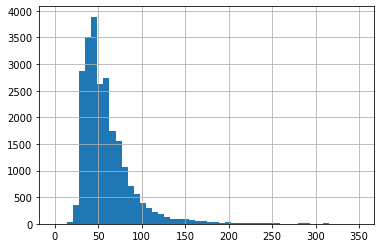

In [60]:
df['total_area'].hist(bins=50, range=(0, 350));

Наибольшое количество квартир с площадью 49 кв.м, и в целом самый популярный диапозон от 30 до 65 кв.м

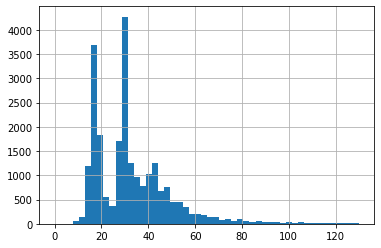

In [61]:
df['living_area'].hist(bins=50, range=(0, 130));

Исключив аномальные значения больше 120 кв.м, мы видим что самой популярной площадью является 18 и 30 кв.м.

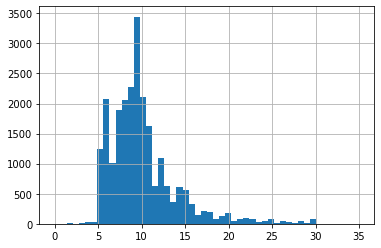

In [62]:
df['kitchen_area'].hist(bins=50, range=(0, 35));

Самой часто вречаемой площадью кухней является 9 кв.м

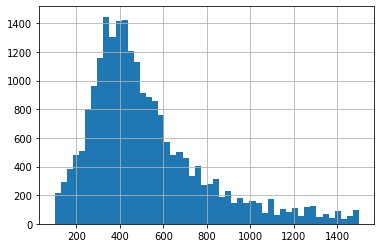

In [63]:
df['last_price'].hist(bins=50, range=(100, 1500));

Больше всего квартир ценною почти в 4 млн. рублей

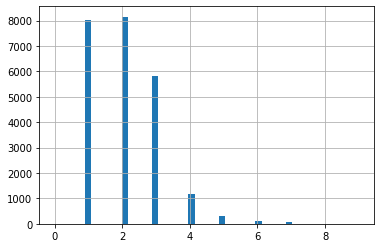

In [64]:
df['rooms'].hist(bins=50, range=(0, 9));

Самые популярные 1-а и 2-х комнатные квартиры

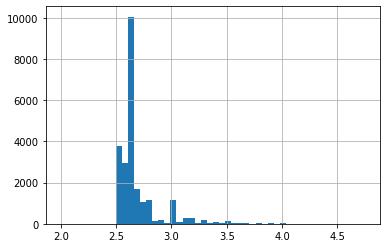

In [65]:
df['ceiling_height'].hist(bins=50, range=(2, 4.75));

Высота потолков встречающаяся чаще всего 2.75

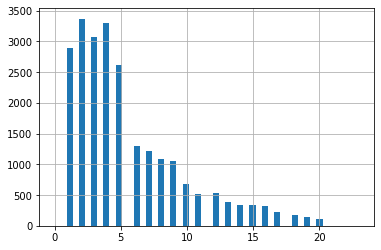

In [66]:
df['floor'].hist(bins=50, range=(0, 23));

Больше всего квартир на 2 и 4 этажах

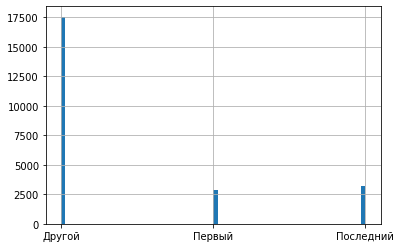

In [67]:
df['type_floors'].hist(bins=70);

Продающихся квартир на первом и последнем этажах значительно меньше 

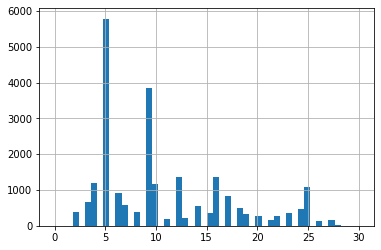

In [68]:
df['floors_total'].hist(bins=50, range=(0, 30));

Самые больше количество продоваемых квартир в 5 и 9 этажных домах

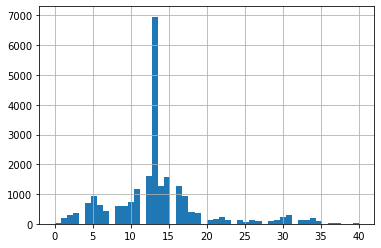

In [69]:
df['cityCenters_nearest'].hist(bins=50, range=(0, 40));

Очень много квартир расположенных от центра на расстоянии примерно 12 км

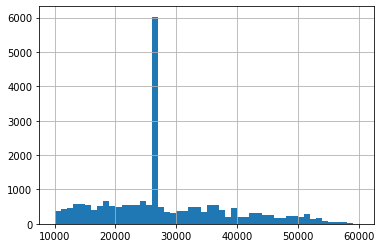

In [70]:
df['airports_nearest'].hist(bins=50, range=(10000, 60000));

Аэропорт для большенства квартир находиться на расстоянии 27 км

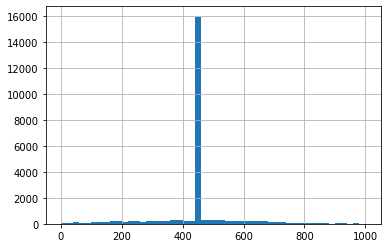

In [71]:
df['parks_nearest'].hist(bins=50, range=(0, 1000));

Парки для большенства квартир находиться на расстоянии полукиллометра

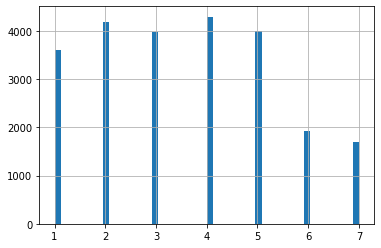

In [72]:
df['day'].hist(bins=50);

На выходных люди не охотно занимаются вопросом покупки недвижимости, возможно потому что их нет в городе, либо не все службы для помощи в осуществлении сделки работают в выходные дни

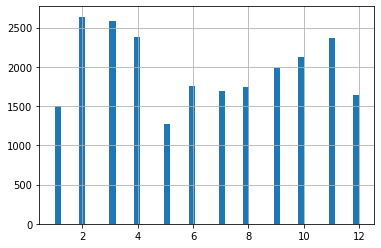

In [73]:
df['month'].hist(bins=50);

Январь и май самые не популярные месяца для сделок, оно и не удивительно

Взглянув на наши гистограмы, видно что у некоторых данных есть выделяющиеся значения из массы.

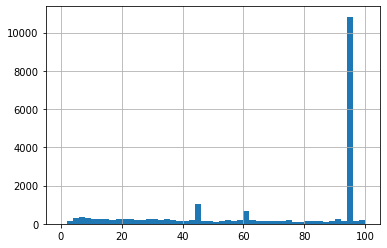

In [74]:
df['days_exposition'].hist(bins=50, range=(0, 100));

Чаще всего объявление висит 95 дней

In [75]:
df['days_exposition'].mean()

75.63331080510264

In [76]:
df['days_exposition'].median()

95.0

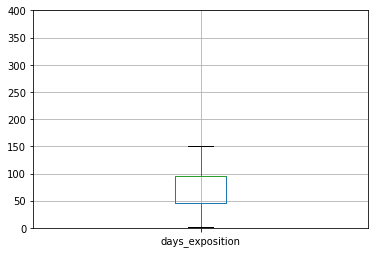

In [77]:
df.boxplot(column=['days_exposition'])
plt.ylim(0, 400);

Из графика видно что быстрыми продажами являются те что были совершенны менее чем за 65 дней, а необычно долгие те что более 95.

Посмотрим какие факторы больше всего влияют на общую (полную) стоимость объекта

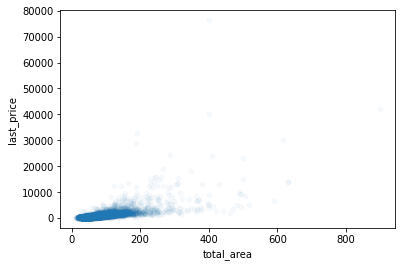

In [78]:
df.plot(x='total_area', y='last_price', kind='scatter', alpha=0.03);

In [79]:
df['last_price'].corr(df['total_area'])

0.6538027221477357

Как видно из графика и значения корреляции Пирсона, зависимость цены от размера площади есть и она положительная, чем больше площадь тем выше цена

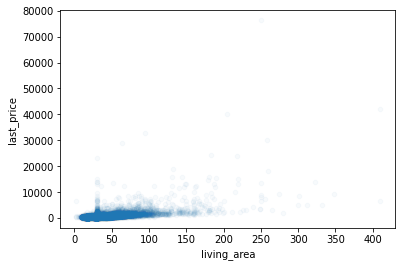

In [80]:
df.plot(x='living_area', y='last_price', kind='scatter', alpha=0.03);

In [81]:
df['living_area'].corr(df['last_price'])

0.5407289073520453

Цена жилой площади так же имеет связь с ценой обьекта, но не так сильно как общая площадь

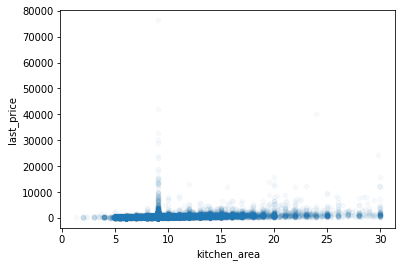

In [82]:
df.plot(x='kitchen_area', y='last_price', kind='scatter', alpha=0.03);

In [83]:
df['kitchen_area'].corr(df['last_price'])

0.26844076355472657

Размер кухни не так сильно влияет на цену квартиры

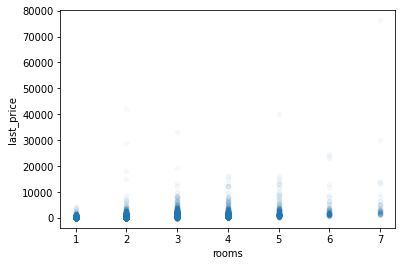

In [84]:
df.plot(x='rooms', y='last_price', kind='scatter', alpha=0.03);

In [85]:
df['rooms'].corr(df['last_price'])

0.3362226985771435

От числа комнат цена квартиры растет, но уже свыше 3, не так сильно

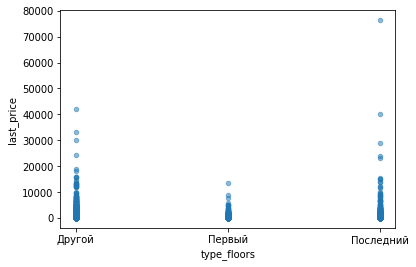

In [86]:
df.plot(x='type_floors', y='last_price', kind='scatter', alpha=0.5);

Мало кто хочет брать на первом этаже

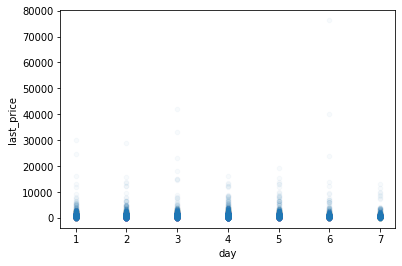

In [87]:
df.plot(x='day', y='last_price', kind='scatter', alpha=0.03);

In [88]:
df['day'].corr(df['last_price'])

0.00152608678272943

Практически нет ни какой зависимости  цены от дня недели

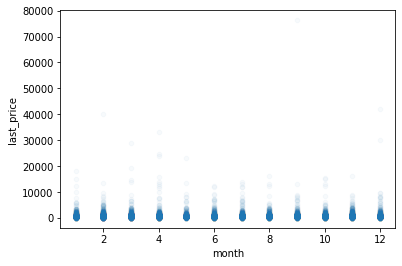

In [89]:
df.plot(x='month', y='last_price', kind='scatter', alpha=0.03);

In [90]:
df['month'].corr(df['last_price'])

0.0027639757499222165

Практически нет ни какой зависимости  цены от месяца и года

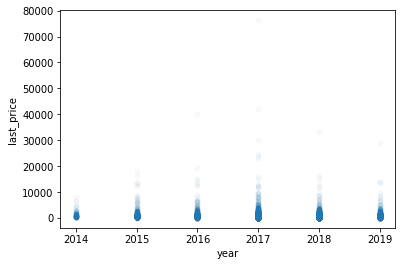

In [91]:
df.plot(x='year', y='last_price', kind='scatter', alpha=0.03);

In [92]:
df['year'].corr(df['last_price'])

-0.0429724636594794

От года тоже нет зависимости, но тут корреляция отрицательная, рынок пошел на спад?

Посмотрим теперь на то как меняется цена в топ 10 населенных пунктах по числу обьявлений

Найдем 10 населенных пунктов с наибольшим числом обьявлений

In [93]:
row = df.value_counts('locality_name', ascending=False).head(10); row

locality_name
Санкт-Петербург      15719
посёлок Мурино         556
посёлок Шушары         440
Всеволожск             398
Пушкин                 369
Колпино                338
посёлок Парголово      327
Гатчина                307
деревня Кудрово        299
Выборг                 237
dtype: int64

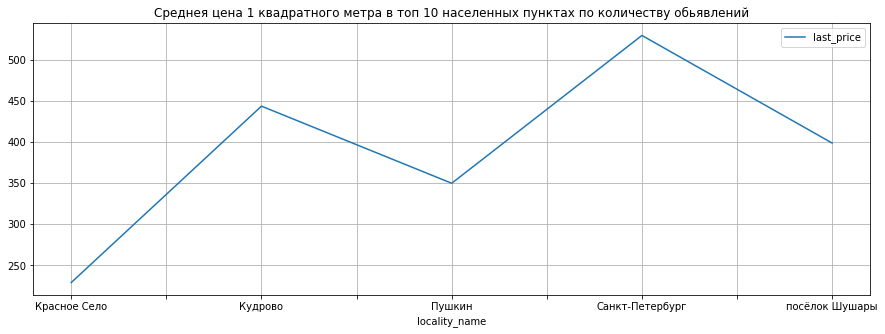

In [94]:
(
    df.query('@row')
    .pivot_table(index='locality_name', values='last_price', aggfunc='mean')
    .plot(grid=True, figsize=(15, 5), title='Среднея цена 1 квадратного метра в топ 10 населенных пунктах по количеству обьявлений')
);

Дороже всех как видно 1 кв.м в среднем стоит в Пушкине, на втором месте СПб.

In [97]:
df.groupby(['locality_name']).agg({'balcony':'count', 'last_price':'mean'}).sort_values('balcony', ascending=False).round().head(10)

,balcony,last_price
locality_name,,
Санкт-Петербург,15719,806.0
посёлок Мурино,556,365.0
посёлок Шушары,440,411.0
Всеволожск,398,379.0
Пушкин,369,647.0
Колпино,338,396.0
посёлок Парголово,327,449.0
Гатчина,307,349.0
деревня Кудрово,299,423.0


**Не могу отсортировать по локации. А то что выше я написал и получил график он не верный?**

Теперь посмотрим на теже изменения цены, но уже в зависимости от удаленности до центра города Санкт-Петербурга.

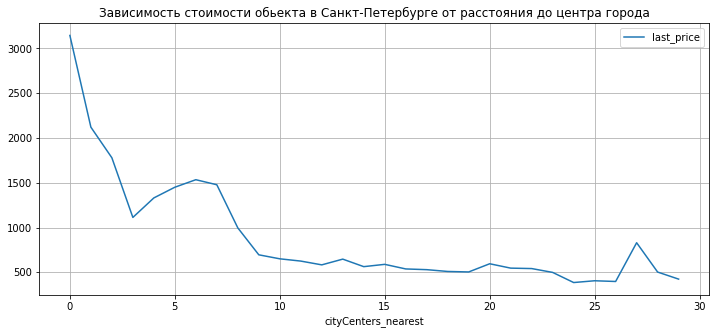

In [96]:
(
df.query('locality_name == "Санкт-Петербург"')\
    .pivot_table(index='cityCenters_nearest', values='last_price', aggfunc='mean')
    .plot(grid=True, figsize=(12,5), title='Зависимость стоимости обьекта в Санкт-Петербурге от расстояния до центра города')
);

Чем дальше от центра тем цена ниже, оно и логично

### Общий вывод

**В ходе проведенного иследованния было сделано:**

    1. Обработан датасет с данными по обьектам недвижимости
    2. Найдены и удалены дубликаты
    3. Пропущенные значения были заполнены там где это было не обходимо на медианные и средние
    4. Проведена зависимость между разными данными в датасета и цены
    5. Постороенны гистограммы отображающие эти самы зависимости и посчитанны корреляции по ним
    6. Так же было выявленно две ключевые зависимости такие как удаленность обьекта от центра города и его площадь к цене
    7. И как долго в среднем продаются обьекты

**Как итог всех этих действий мы можем сказать что:**

    Время года, месяц, день не влияют на цену
    Больше всего обьявлений о продаже было в Санкт-Петербурге
    Цена сильно зависит от удаленности от центра города(чем дальше чем дешевле) и так же от площади
    Цена не сильно зависит от количество комнат, если их уже более 3-х
    Среднее время продажи 3-5 месяцев
    Обьекты на первом этаже являются самыми не привлекательными для покупки, не далеко и те что на последнем
    Средняя цена за 1 кв.м различается по населенным пунктам, в Пушкине и Санкт-Петербурге дороже, чем в области
